# AirBnb Data Analysis Study

### 1) Introduce

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
data = pd.read_csv("../datasets/Airbnb_Open_Data.csv")
df = data.copy()
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [27]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [28]:
# Controlling NaN values
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [29]:
# Deleting the columns which don't have role in the analysis
df.drop(["license", "host name", "host_identity_verified", "NAME", "lat", "long", "country", "country code"], axis= 1, inplace= True)
df.dropna(inplace= True, axis= 0)

In [30]:
df.columns

Index(['id', 'host id', 'neighbourhood group', 'neighbourhood',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')

In [31]:
# Converting the data types
df["price"] = df["price"].str.strip("$").str.replace(",", "")
df["price"] = df["price"].astype(float)
df["service fee"] = df["service fee"].str.strip("$")
df["service fee"] = df["service fee"].astype(float)
df["Construction year"] = df["Construction year"].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40162 entries, 0 to 102595
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              40162 non-null  int64  
 1   host id                         40162 non-null  int64  
 2   neighbourhood group             40162 non-null  object 
 3   neighbourhood                   40162 non-null  object 
 4   instant_bookable                40162 non-null  object 
 5   cancellation_policy             40162 non-null  object 
 6   room type                       40162 non-null  object 
 7   Construction year               40162 non-null  int64  
 8   price                           40162 non-null  float64
 9   service fee                     40162 non-null  float64
 10  minimum nights                  40162 non-null  float64
 11  number of reviews               40162 non-null  float64
 12  last review                     4016

In [33]:
# Final dataset
df.head()

,id,host id,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,80014485718,Brooklyn,Kensington,False,strict,Private room,2020,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,52335172823,Manhattan,Midtown,False,moderate,Entire home/apt,2007,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,1003689,92037596077,Manhattan,East Harlem,False,moderate,Entire home/apt,2009,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,1004098,45498551794,Manhattan,Murray Hill,True,flexible,Entire home/apt,2013,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."
6,1004650,61300605564,Brooklyn,Bedford-Stuyvesant,False,moderate,Private room,2015,71.0,14.0,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...


In [34]:
# Optimaze tools to use
def filtered_table(dataFrame, column, value):
    filteredTable  = dataFrame[dataFrame[column] == value]
    return filteredTable
def selectneighbourhood(dataFrame, group, value, by):
    selectedTable = dataFrame.groupby(group)[value].mean()
    selectedTable = pd.DataFrame(selectedTable)
    selectedTable.sort_values(by = by, ascending= False )
    return selectedTable

### 2) Data Virtualisation

#### 2.1) Distribution According to Nieghbourhood

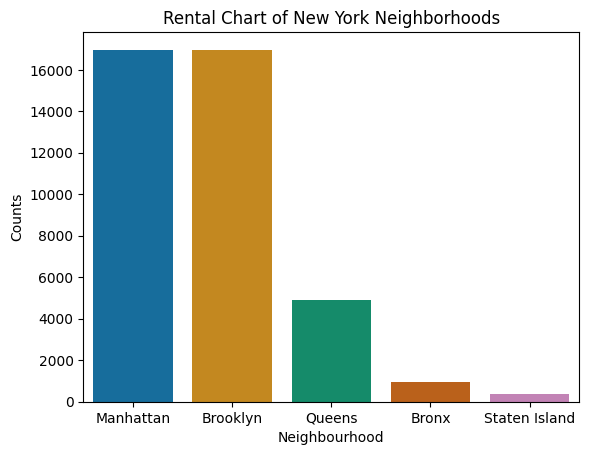

In [35]:
neighbourhood_groupDF = df["neighbourhood group"].value_counts().reset_index()
neighbourhood_groupDF.columns = ["Neighbourhood", "Counts"]

sns.barplot(x="Neighbourhood",
            y="Counts",
            data=neighbourhood_groupDF,
            palette="colorblind")
plt.xlabel("Neighbourhood")
plt.ylabel("Counts")
plt.title("Rental Chart of New York Neighborhoods")
plt.show()


We see that the most rentals are in Brooklyn and Manhattan. Therefore, it would be pointless to highlight the Bronx and Staten Island in advertising efforts. Queens, on the other hand, may get a small share of the advertising budget.

#### 2.2) Distribution According to Cancellation Conditions

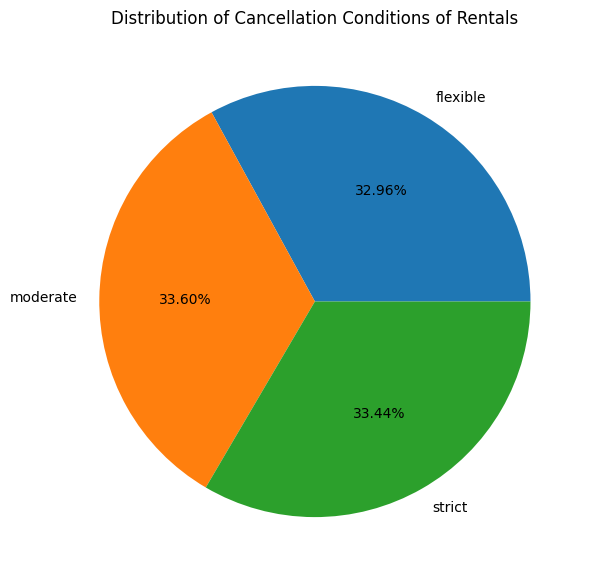

In [51]:
cancellation_policyDF = df.groupby("cancellation_policy")["cancellation_policy"].value_counts()
cancellation_policyDF = pd.DataFrame(cancellation_policyDF)
plt.figure(figsize= (7,7))
plt.pie(x = "count",
        labels= cancellation_policyDF.index,
        autopct= '%1.2f%%',
        data = cancellation_policyDF);
plt.title("Distribution of Cancellation Conditions of Rentals")
plt.show()

We see that cancellation conditions are equally distributed. Therefore, it is not recommended that the company make any changes to the cancellation conditions.

#### 2.3) Distribution According to Room Type

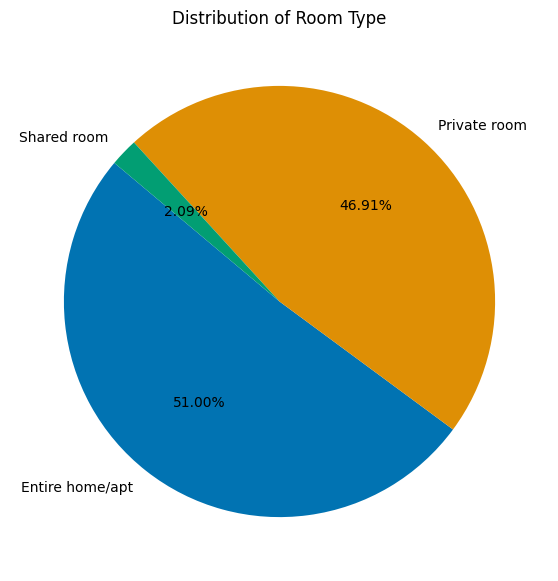

In [37]:
room_typeDF = df.groupby("room type")["room type"].value_counts()
room_typeDF = pd.DataFrame(room_typeDF)
plt.figure(figsize= (7,7))
plt.pie(x= "count",
        labels= room_typeDF.index,
        autopct= '%1.2f%%',
        startangle= 140,
        colors= colors,
        data= room_typeDF);
plt.title("Distribution of Room Type")
plt.show()


Shared rooms seem to be the least preferred room type. Therefore, it is recommended to include images of entire home and private rooms in the advertising work.

#### 2.4) Number of Rental by Years

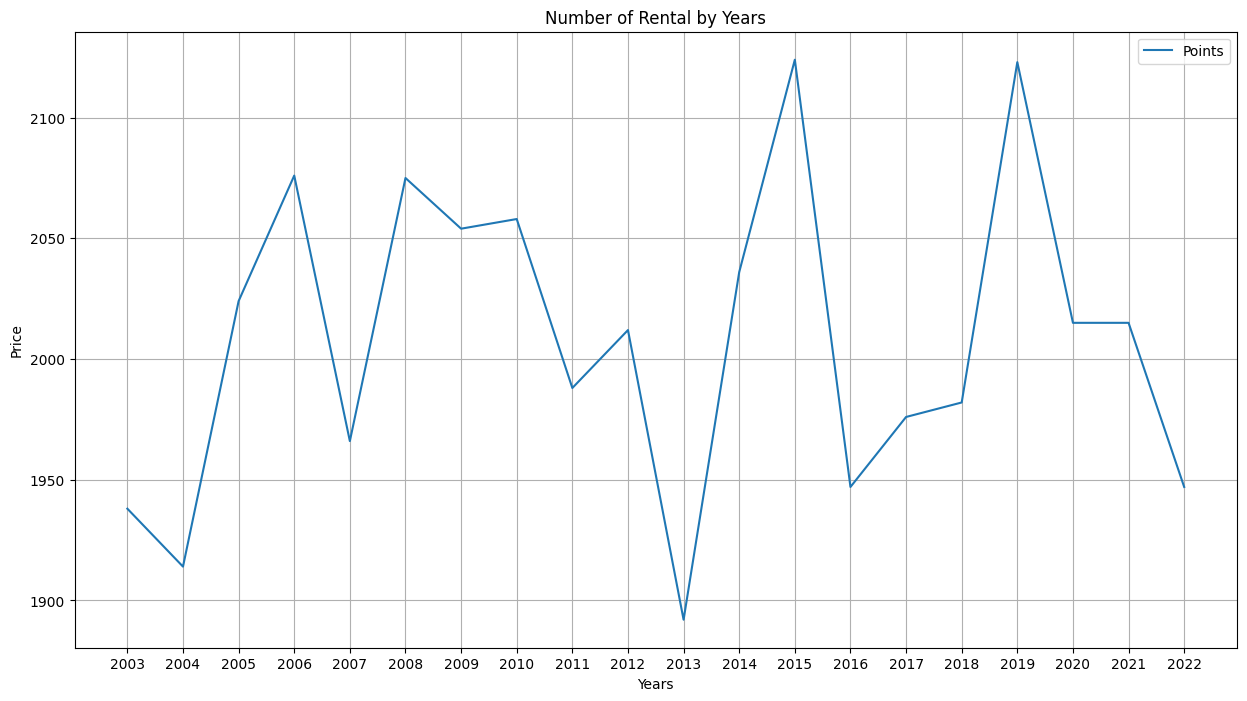

In [38]:
rentalsbyyearDF = df.groupby("Construction year")["id"].count()
rentalsbyyearDF = pd.DataFrame(rentalsbyyearDF)
plt.figure(figsize=(15,8))
sns.lineplot(x = rentalsbyyearDF.index,
            y = "id",
            label = "Points", 
            data= rentalsbyyearDF);
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Number of Rental by Years")
plt.grid(True)
plt.xticks(rentalsbyyearDF.index)
plt.show()

It is observed that the number of rentals of houses built in 2015 and 2019 is much higher than others. It is recommended to examine the houses built in these years and include visuals in this direction in the advertising work.

#### 2.5) According to Availability Conditions

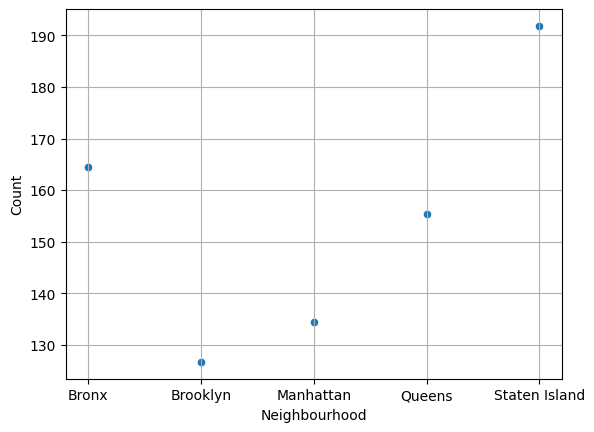

In [39]:
availabilityDF = df.groupby("neighbourhood group")["availability 365"].mean()
availabilityDF = pd.DataFrame(availabilityDF)
sns.scatterplot(x = availabilityDF.index,
                y = "availability 365",
                data= availabilityDF,
                markers= 'D');
plt.grid(True)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.show()

Although the most rentals are made in Brooklyn and Manhattan, the fact that these areas have the least available days of the year creates a serious loss of income for AirBnb. In the advertising campaign, hosts in Brooklyn and Manhattan should be encouraged to rent out their homes throughout the year.

#### 2.6) According to Prices

In [40]:
BrooklynDf = filtered_table(df, "neighbourhood group", "Brooklyn")
BrooklynPriceDf = selectneighbourhood(BrooklynDf,"neighbourhood", "price", "price")
ManhattanDF = filtered_table(df, "neighbourhood group", "Manhattan")
ManhattanPriceDF = selectneighbourhood(ManhattanDF,"neighbourhood", "price", "price")
BronxDF = filtered_table(df, "neighbourhood group", "Bronx")
BronxPriceDF = selectneighbourhood(BronxDF,"neighbourhood", "price", "price")
QueensDF = filtered_table(df, "neighbourhood group", "Queens")
QueensPriceDF = selectneighbourhood(QueensDF,"neighbourhood", "price", "price")
StatenIslandDF = filtered_table(df, "neighbourhood group", "Staten Island")
StatenIslandPriceDF = selectneighbourhood(StatenIslandDF,"neighbourhood", "price", "price")


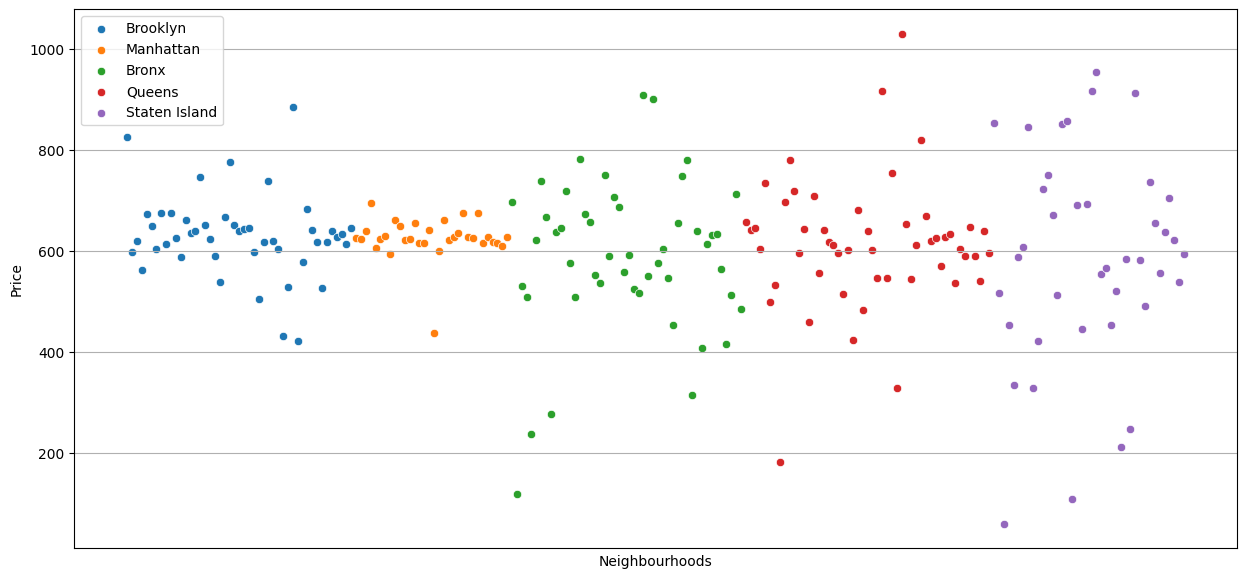

In [41]:
plt.figure(figsize= (15,7))
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Brooklyn",
            data = BrooklynPriceDf);
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Manhattan",
            data = ManhattanPriceDF);
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Bronx",
            data = BronxPriceDF);
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Queens",
            data = QueensPriceDF);
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Staten Island",
            data = StatenIslandPriceDF);
plt.xticks([])
plt.xlabel("Neighbourhoods")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In Brooklyn and Manhattan, where the demand is highest, price ranges are stuck between $400-$800 compared to other regions. Increasing options in Manhattan and Brooklyn will allow AirBnb to generate much more commission income. This change means that people from different income groups will prefer Manhattan and Brooklyn. Manhattan and Brooklyn are currently the most in-demand locations.

### 3) Modeling

In [42]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [43]:
datainmodel = df[["price",  "service fee", "Construction year" , "neighbourhood group", "cancellation_policy","room type", "availability 365"]]


In [44]:
# Data Maping
datainmodel["neighbourhood group_mapping"] = datainmodel["neighbourhood group"].map({"Brooklyn": 1,
                                                                                     "Manhattan": 2,
                                                                                     "Staten Island": 3,
                                                                                     "Queens": 4,
                                                                                     "Bronx": 5})
datainmodel["room type_mapping"] = datainmodel["room type"].map({"Private room":1,
                                                                 "Entire home/apt":2,
                                                                 "Shared room":3,})
datainmodel["cancellation_policy_mapping"] = datainmodel["cancellation_policy"].map({"strict": 1,
                                                                                     "moderate": 2,
                                                                                     "flexible": 3})

In [45]:
datainmodel.head()

,price,service fee,Construction year,neighbourhood group,cancellation_policy,room type,availability 365,neighbourhood group_mapping,room type_mapping,cancellation_policy_mapping
0,966.0,193.0,2020,Brooklyn,strict,Private room,286.0,1,1,1
1,142.0,28.0,2007,Manhattan,moderate,Entire home/apt,228.0,2,2,2
4,204.0,41.0,2009,Manhattan,moderate,Entire home/apt,289.0,2,2,2
5,577.0,115.0,2013,Manhattan,flexible,Entire home/apt,374.0,2,2,3
6,71.0,14.0,2015,Brooklyn,moderate,Private room,224.0,1,1,2


In [46]:
datainmodel_numerique = datainmodel.drop(["neighbourhood group", "cancellation_policy","room type"], axis= 1)

In [47]:
datainmodel_numerique.corr()

,price,service fee,Construction year,availability 365,neighbourhood group_mapping,room type_mapping,cancellation_policy_mapping
price,1.000000,0.999991,0.001447,-0.007736,-0.001228,0.001166,0.005039
service fee,0.999991,1.000000,0.001425,-0.007723,-0.001241,0.001183,0.005058
Construction year,0.001447,0.001425,1.000000,-0.010661,-0.001142,0.001495,-0.003720
availability 365,-0.007736,-0.007723,-0.010661,1.000000,0.079025,0.025412,-0.002791
neighbourhood group_mapping,-0.001228,-0.001241,-0.001142,0.079025,1.000000,-0.041588,-0.004758
room type_mapping,0.001166,0.001183,0.001495,0.025412,-0.041588,1.000000,0.007137
cancellation_policy_mapping,0.005039,0.005058,-0.003720,-0.002791,-0.004758,0.007137,1.000000


In [48]:
y = pd.DataFrame(datainmodel["price"])
X = datainmodel.drop(["price", "neighbourhood group","cancellation_policy", "room type"], axis= 1)


In [49]:
# Separation of test and training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state= 42)

In [50]:
const =sm.add_constant(X_train)
model1 = sm.OLS(y_train, const).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.961e+08
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        03:17:40   Log-Likelihood:                -56735.
No. Observations:               32129   AIC:                         1.135e+05
Df Residuals:                   32122   BIC:                         1.135e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.5422      2.767     -1.280      0.201      -8.967       1.882
service fee                     4.9997      0.000   4.21e+04      0.000       4.999       5.000
Construction year               0.0018      0.001      1.300      0.193      -0.001       0.004
availability 365            -7.495e-05   5.97e-05     -1.255      0.209      -0.000    4.21e-05
neighbourhood group_mapping     0.0068      0.007      0.904      0.366      -0.008       0.021
room type_mapping              -0.0057      0.015     -0.385      0.700      -0.034       0.023
cancellation_policy_mapping    -0.0106      0.010     -1.092      0.275      -0.030       0.008
==============================================================================
Omnibus:                   113286.571   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2252.835
Skew:                           0.008   Prob(JB):                         0.00
Kurtosis:                       1.703   Cond. No.                     7.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Result of the Model:

Independent variables are grouped as financial, spatial and rental transactions.

First, the relationship between the financial independent variable "service fee" and the independent variable "price" is that for each dollar of service fee increases, the price will increase by 4.99 times. Based on this, it is suggested that if AirBnb focuses on this issue in its advertising work, customers' readiness to pay approximately five times the fee for each unit of service they will receive will form the basic strategy of the advertising work to be done.

The relationship between ["neighbourhood_ group"] and ["Construction year"], which are determined as spatial fixed variables, and the dependent variable ["price"] is positive. Based on this, it has been observed that customers are ready to pay more for houses with a newer construction date and closer to central places such as Manhattan and Brooklyn. It is recommended to use central places and newly built houses as districts in the advertising work.

The independent variables ["room type"], ["cancellation_policy"] and ["availability 365"] determined for the rental conditions have a negative relationship with the dependent variable ["price"]. As cancellation conditions are relaxed and the number of days available for rent during the year increases, the amount customers are willing to pay for the house decreases. This indicates that customers are more interested in houses that are in high demand. It is recommended that AirBnb include this issue in its advertising work by adding options such as early booking to its application, as days with fewer available rental days during the year receive more demand.